In [1]:
import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.preprocessing import scale, StandardScaler, normalize
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pickle
from collections import Counter

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

from altair import Chart, X, Y, Axis, SortField

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.1f}'.format

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

sns.set()

In [2]:
df = pd.read_csv('./data.csv',encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.5,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.4,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.8,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.4,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.4,17850.0,United Kingdom


In [3]:
total_spend = df['Quantity'] * df['UnitPrice']

In [4]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)



In [5]:
df['Quarter'] = df.InvoiceDate.dt.quarter
df['Month'] = df.InvoiceDate.dt.month
df['Week'] = df.InvoiceDate.dt.week




C:\Users\pc\AppData\Local\Temp\ipykernel_14024\1850283500.py:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quarter,Month,Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5,17850.0,United Kingdom,4,12,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,4,12,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850.0,United Kingdom,4,12,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,4,12,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,4,12,48


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Quarter      541909 non-null  int64         
 9   Month        541909 non-null  int64         
 10  Week         541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 45.5+ MB


In [8]:
total_spend = df['Quantity'] * df['UnitPrice']


In [9]:
df= df.assign(total_spend=total_spend.values)

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quarter,Month,Week,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5,17850.0,United Kingdom,4,12,48,15.3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,4,12,48,20.3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850.0,United Kingdom,4,12,48,22.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,4,12,48,20.3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,4,12,48,20.3


In [11]:
df[(df.Quantity<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quarter,Month,Week,total_spend
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.5,14527.0,United Kingdom,4,12,48,-27.5
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.7,15311.0,United Kingdom,4,12,48,-4.7
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.6,17548.0,United Kingdom,4,12,48,-19.8
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.3,17548.0,United Kingdom,4,12,48,-7.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.3,17548.0,United Kingdom,4,12,48,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.8,14397.0,United Kingdom,4,12,49,-9.1
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.7,15498.0,United Kingdom,4,12,49,-224.7
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.9,15311.0,United Kingdom,4,12,49,-54.8
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.2,17315.0,United Kingdom,4,12,49,-1.2


In [12]:
print('InoviceNo에 환불상품 개수는',df['InvoiceNo'].str.contains("C").sum(), '개입니다 데이터셋의',(df['InvoiceNo'].str.contains("C").sum()/len(df))*100, '% 를 차지합니다.')
#print('There are:',df['InvoiceNo'].str.contains("C").sum(), 'orders marked C, which contribute',(df['InvoiceNo'].str.contains("C").sum()/len(df))*100, '% of the dataset.')


InoviceNo에 환불상품 개수는 9288 개입니다 데이터셋의 1.7139409015166756 % 를 차지합니다.


In [13]:
cancelled_orders = df[df.InvoiceNo.str.contains("C")]
cancelled_orders.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quarter,Month,Week,total_spend
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.5,14527.0,United Kingdom,4,12,48,-27.5
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.7,15311.0,United Kingdom,4,12,48,-4.7
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.6,17548.0,United Kingdom,4,12,48,-19.8
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.3,17548.0,United Kingdom,4,12,48,-7.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.3,17548.0,United Kingdom,4,12,48,-7.0
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.3,17548.0,United Kingdom,4,12,48,-7.0
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.5,17548.0,United Kingdom,4,12,48,-41.4
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.6,17548.0,United Kingdom,4,12,48,-19.8
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.6,17548.0,United Kingdom,4,12,48,-39.6
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.2,17897.0,United Kingdom,4,12,48,-25.5


In [14]:
c1_tmp = pd.DataFrame(cancelled_orders['InvoiceNo'])
c2_tmp = cancelled_orders['InvoiceNo'].str.extract('(\d+)').astype(int)
c1_tmp['invoice2'] = c2_tmp

In [15]:
df = df[~df['InvoiceNo'].isin(c1_tmp['InvoiceNo'])]
df = df[~df['InvoiceNo'].isin(c1_tmp['invoice2'])]

In [16]:
print('InoviceNo에 환불상품 개수는',df['InvoiceNo'].str.contains("C").sum(), '개입니다 데이터셋의',(df['InvoiceNo'].str.contains("C").sum()/len(df))*100, '% 를 차지합니다.')



InoviceNo에 환불상품 개수는 0 개입니다 데이터셋의 0.0 % 를 차지합니다.


In [17]:
df = df.drop(df[df.Quantity < 0].index)

In [18]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quarter,Month,Week,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5,17850.0,United Kingdom,4,12,48,15.3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,4,12,48,20.3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850.0,United Kingdom,4,12,48,22.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,4,12,48,20.3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,4,12,48,20.3
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.8,12680.0,France,4,12,49,10.2
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680.0,France,4,12,49,12.6
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.2,12680.0,France,4,12,49,16.6
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.2,12680.0,France,4,12,49,16.6


In [19]:
# group by customer ID to create a rank buyers by how many products they buy in total.
temp = df.groupby(by=['CustomerID'], as_index=False)['InvoiceDate'].count()
products_per_basket = temp.rename(columns = {'InvoiceDate':'구매한 물품수'})
top_baskets = products_per_basket.sort_values('구매한 물품수', ascending=False)
top_baskets.head(10)

,CustomerID,구매한 물품수
4011,17841.0,7847
1880,14911.0,5677
1290,14096.0,5111
326,12748.0,4596
1662,14606.0,2700
2177,15311.0,2379
1690,14646.0,2080
562,13089.0,1818
691,13263.0,1677
1435,14298.0,1637


In [20]:
grouped = top_baskets[:50]
grouped.reset_index(level=0, inplace=True)
grouped.sort_values('구매한 물품수', ascending=False, inplace=True)
grouped['CustomerID'] = grouped['CustomerID'].astype(str)

C:\Users\pc\AppData\Local\Temp\ipykernel_14024\2440457240.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pc\AppData\Local\Temp\ipykernel_14024\2440457240.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\pc\AppData\Local\Temp\ipykernel_14024\1867304219.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



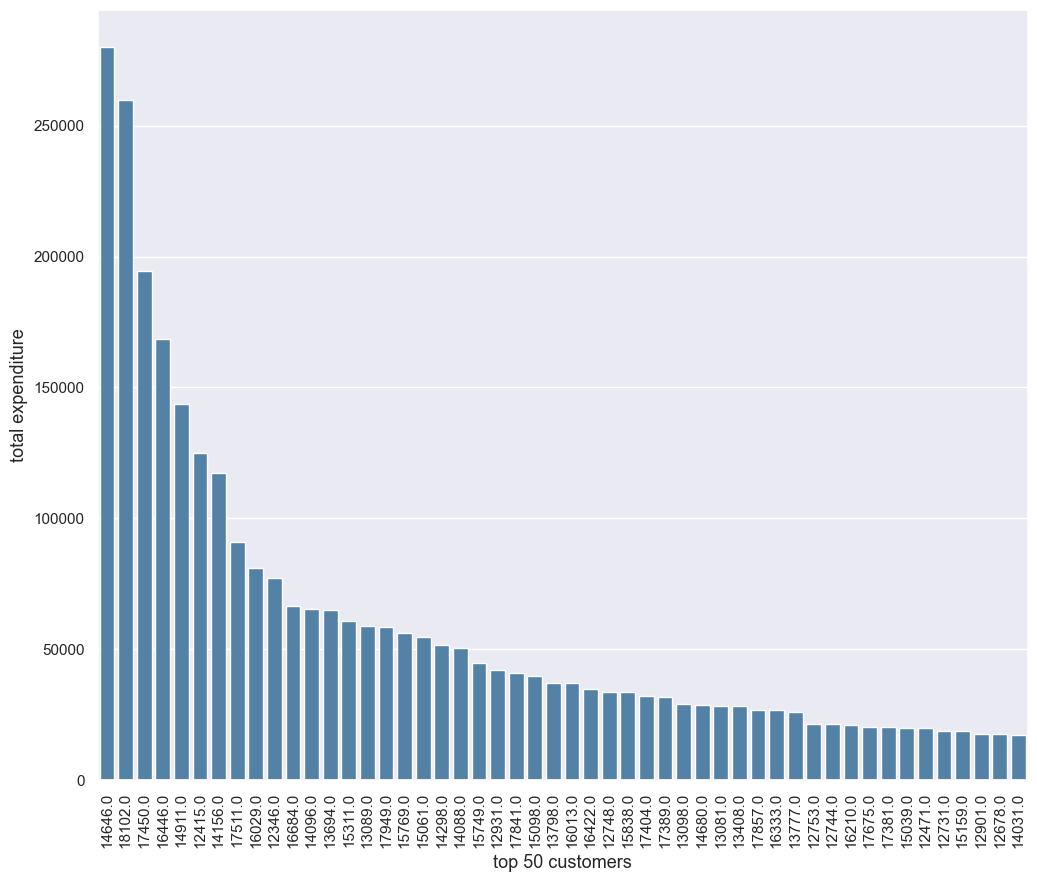

In [22]:
grouped  = df.groupby(['CustomerID']).sum()['total_spend'].sort_values(ascending=False)
grouped_top = pd.DataFrame(grouped.head(50))
grouped_top.reset_index(level=0, inplace=True)
grouped_top.sort_values('CustomerID', ascending=False)

f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped_top['CustomerID'], y=grouped_top['total_spend'],order=grouped_top['CustomerID'],color='steelblue')
plt.ylabel('total expenditure', fontsize=13)
plt.xlabel('top 50 customers', fontsize=13)
plt.show()

data_plot = [go.Bar(x=grouped_top['CustomerID'], y=grouped_top['total_spend'])]
layout = go.Layout(yaxis={'autorange':True,'title':'상위 50 customers'},xaxis={'type':'category','title':'총 지출'})
fig = go.Figure(data=data_plot, layout=layout)
iplot(fig)

In [23]:
data_grouped = df.groupby('CustomerID')
data_cluster=pd.DataFrame(columns=['Quantity','UnitPrice', 'total_spend', 'CustomerID'])
count=0
#data_grouped.head(5)
for k,v in (data_grouped):
    data_cluster.loc[count] = [(v['Quantity'].sum()), v['UnitPrice'].sum(), v['total_spend'].sum(), k]
    count+=1

# Applying K-Means Clustering Algorithm to quantity, and total spend
X = data_cluster.iloc[:, [0, 2]].values
data_cluster.head()

,Quantity,UnitPrice,total_spend,CustomerID
0,74215.0,1.0,77183.6,12346.0
1,2458.0,481.2,4310.0,12347.0
2,2341.0,178.7,1797.2,12348.0
3,631.0,605.1,1757.6,12349.0
4,197.0,65.3,334.4,12350.0


In [23]:
data_grouped = df.groupby('CustomerID')
data_cluster=pd.DataFrame(columns=['Quantity','UnitPrice', 'total_spend', 'CustomerID'])
count=0
#data_grouped.head(5)
for k,v in (data_grouped):
    data_cluster.loc[count] = [(v['Quantity'].sum()), v['UnitPrice'].sum(), v['total_spend'].sum(), k]
    count+=1

# Applying K-Means Clustering Algorithm to quantity, and total spend
X = data_cluster.iloc[:, [0, 2]].values
data_cluster.head()

,Quantity,UnitPrice,total_spend,CustomerID
0,74215.0,1.0,77183.6,12346.0
1,2458.0,481.2,4310.0,12347.0
2,2341.0,178.7,1797.2,12348.0
3,631.0,605.1,1757.6,12349.0
4,197.0,65.3,334.4,12350.0


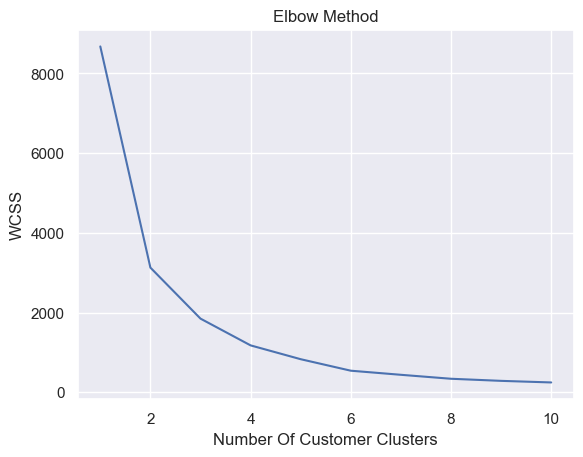

In [48]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X= sc_X.fit_transform(X)
#Using the Elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = [] #Within cluster sum of squares (inertia)

# https://stats.stackexchange.com/questions/185396/why-is-k-means-slower-than-random-initialization-k-means/185422
#n_clusters is no.of clusters given by this method,
#k-means++ is an random initialization methods for centriods to avoid random initialisation trap,
#max_iter is max no of iterations defined when k-means is running
#n_init is no of times k-means will run with different initial centroids

for i in range(1,11): #From 2-10 doing multiple random initializations can make a huge difference to find a better local optima
    kmeans = KMeans(n_clusters = i, init ='k-means++',max_iter=300,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss)
plt.title('Elbow Method')
plt.xlabel('Number Of Customer Clusters')
plt.ylabel('WCSS')
plt.show()

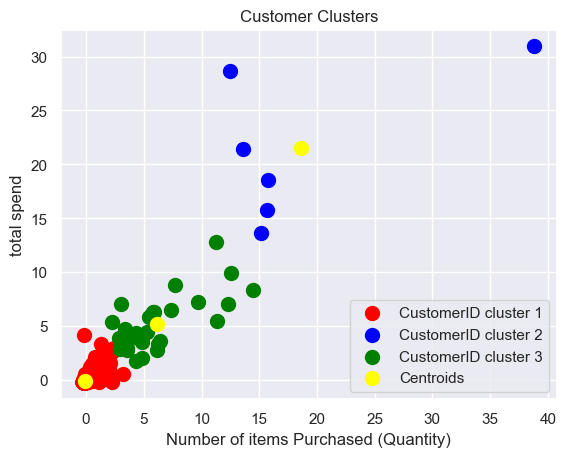

In [89]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3,init='k-means++')
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'CustomerID cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'CustomerID cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'CustomerID cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Customer Clusters')
plt.xlabel('Number of items Purchased (Quantity)')
plt.ylabel('total spend')
plt.legend()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_7592\3453583765.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



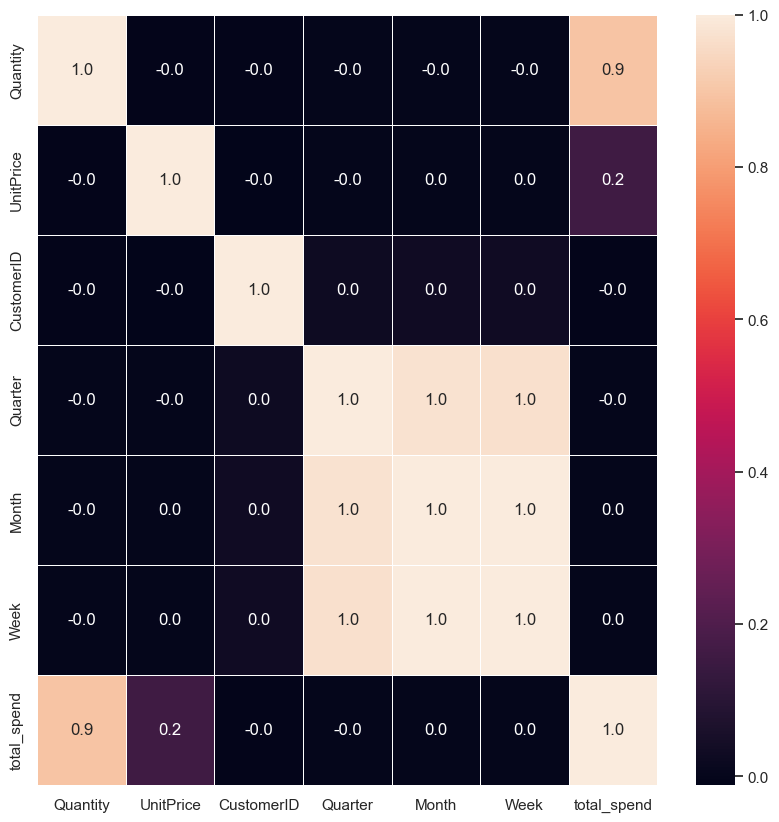

In [24]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [62]:
df['total_spend'].mean()

20.035499635788703

In [63]:
data2 = df[(df['total_spend'] >0) & (df['total_spend'] < 100)]

In [67]:
data2['total_spend'].value_counts().sum()

516529

C:\Users\pc\AppData\Local\Temp\ipykernel_14024\3894616675.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




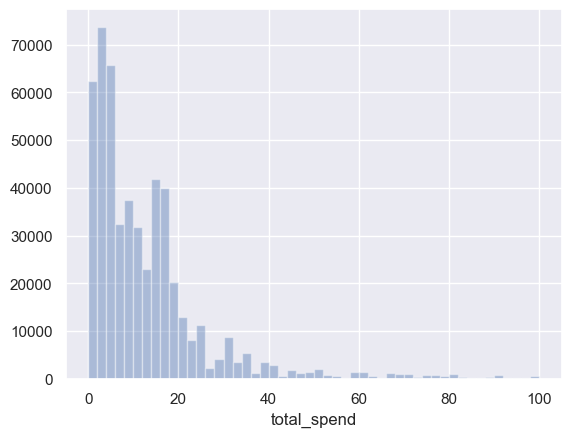

In [64]:
sns.distplot(data2['total_spend'],kde = False)
plt.show()


In [69]:
spend_label = []
for i in range(0,len(data2),1):
    if data2['total_spend'].iloc[i] < 10:
        spend_label.append(0)
    elif data2['total_spend'].iloc[i] >20:
        spend_label.append(2)
    else:
        spend_label.append(1)

In [75]:
data2['spend_label'] = spend_label


C:\Users\pc\AppData\Local\Temp\ipykernel_14024\282132476.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
data2['spend_label'].value_counts()

0    271839
1    157958
2     86732
Name: spend_label, dtype: int64

In [85]:
data2['spend_label'].value_counts()[2]/(data2['spend_label'].value_counts()[0]+data2['spend_label'].value_counts()[1]+data2['spend_label'].value_counts()[2])*100

16.79131278205096

C:\Users\pc\AppData\Local\Temp\ipykernel_7592\1165292419.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



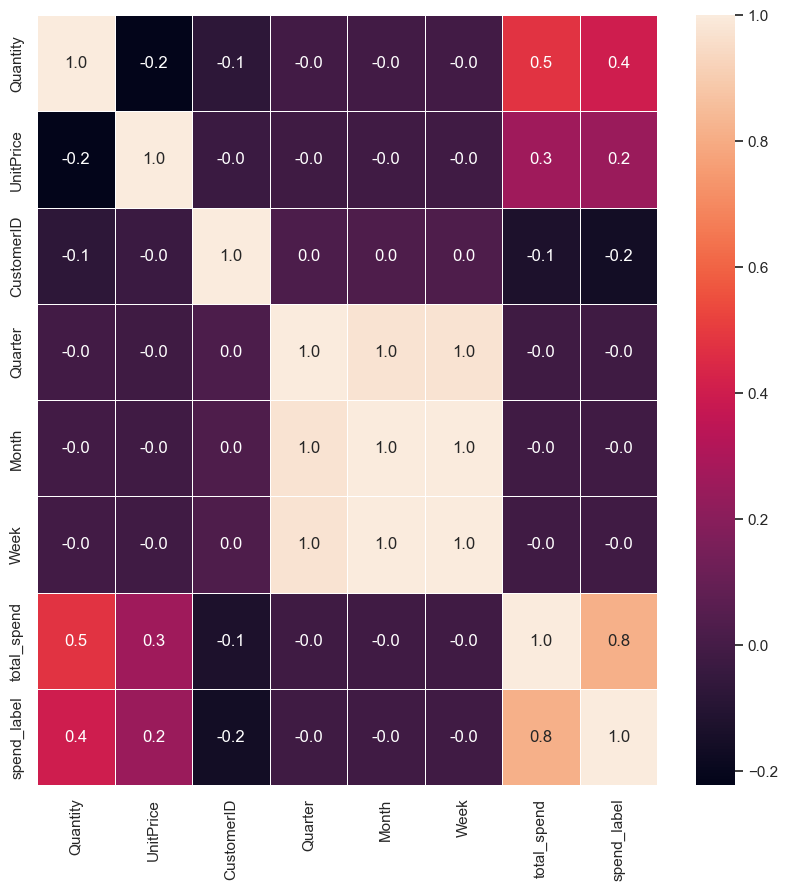

In [37]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [62]:
data2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quarter,Month,Week,Weekday,Day,total_spend,spend_label
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5,17850.0,United Kingdom,4,12,48,2,1,15.3,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,4,12,48,2,1,20.3,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850.0,United Kingdom,4,12,48,2,1,22.0,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,4,12,48,2,1,20.3,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,4,12,48,2,1,20.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.8,12680.0,France,4,12,49,4,9,10.2,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680.0,France,4,12,49,4,9,12.6,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.2,12680.0,France,4,12,49,4,9,16.6,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.2,12680.0,France,4,12,49,4,9,16.6,1


In [38]:
data3=data2.drop(['total_spend','Month','Quarter'],axis=1)

C:\Users\pc\AppData\Local\Temp\ipykernel_7592\4199778706.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



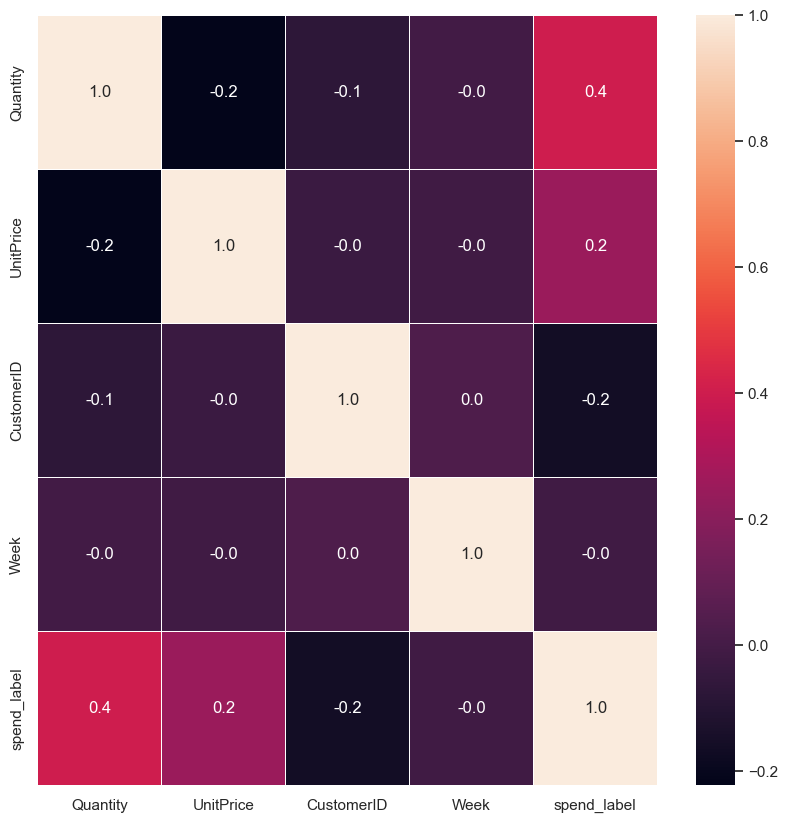

In [39]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data3.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [40]:
data3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Week,spend_label
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5,17850.0,United Kingdom,48,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,48,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850.0,United Kingdom,48,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,48,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,48,2
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.8,12680.0,France,49,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680.0,France,49,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.2,12680.0,France,49,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.2,12680.0,France,49,1


In [42]:
data3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Week,spend_label
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5,17850.0,United Kingdom,48,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,48,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850.0,United Kingdom,48,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,48,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,48,2
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.8,12680.0,France,49,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680.0,France,49,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.2,12680.0,France,49,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.2,12680.0,France,49,1


In [48]:
df_train = data3[data3.InvoiceDate<'2011-11-01']
df_test = data3[data3.InvoiceDate>='2011-11-01']

In [69]:
del X_train
del y_train

del X_test
del y_test

In [70]:
X_train = df_train.drop(labels=['InvoiceNo', 'StockCode', 'Description', 
                                'Country', 'spend_label','InvoiceDate','CustomerID'],axis=1)
y_train = df_train.spend_label

X_test = df_test.drop(labels=['InvoiceNo', 'StockCode', 'Description', 
                              'Country', 'spend_label','InvoiceDate','CustomerID'],axis=1)
y_test = df_test.spend_label


In [71]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.model_selection import  cross_val_score
# from sklearn.externals import joblib #for saving the trained model

In [72]:
import itertools

# confusion matrix plotting function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [93]:
from sklearn.metrics import make_scorer

# Metric used to measure the model (Root Mean Square Error)
def rmse(y_actual, y_pred):
    rmse = np.sqrt(mean_squared_error(y_actual,y_pred))
    return rmse
rmse_cv = make_scorer(rmse, greater_is_better=False)

In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_cv = make_scorer(rmse, greater_is_better=False)

In [75]:
param_distributions = {'n_estimators': [10,50,100,150,200], 'max_features':['auto','sqrt','log2'], 
                       'min_samples_leaf':[1,2,5,7,10],'min_samples_split': [2, 3, 5, 10, 15]}
rf_main = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions, verbose=2, 
                             n_iter = 100,cv=5,scoring=rmse_cv,error_score='raise')
%time rf_main.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=50; total time=   2.9s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=50; total time=   3.0s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=50; total time=   3.0s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=50; total time=   3.1s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=50; total time=   3.2s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  20.5s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  19.2s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  19.5s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; to

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestRegressor(random_state=42), n_iter=100,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 7, 10],
                                        'min_samples_split': [2, 3, 5, 10, 15],
                                        'n_estimators': [10, 50, 100, 150,
                                                         200]},
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=2)

In [95]:
print('Best parameters for Random Forest Regression Model: {}'.format(rf_main.best_params_))


Best parameters for Random Forest Regression Model: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto'}


In [96]:
best_params=rf_main.best_params_

In [98]:
from sklearn.ensemble import RandomForestClassifier


CPU times: total: 27.5 s
Wall time: 27.5 s
정확도: 0.997764783551825


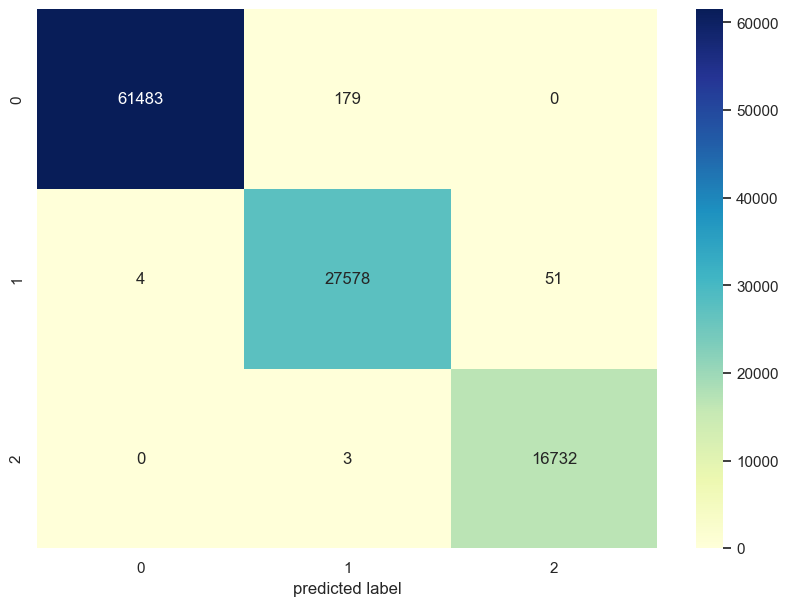

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61662
           1       0.99      1.00      1.00     27633
           2       1.00      1.00      1.00     16735

    accuracy                           1.00    106030
   macro avg       1.00      1.00      1.00    106030
weighted avg       1.00      1.00      1.00    106030

Precision: [0.99993495 0.9934438  0.99696121]
Recall: [0.99709708 0.99800963 0.99982073]


In [102]:
best_rf = RandomForestClassifier(**best_params, random_state=42)
%time best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# 정확도 평가
print("정확도:", accuracy_score(y_test, y_pred))

# Confusion Matrix 생성
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt='d')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.ylabel('')
plt.show()
print(classification_report(y_test, y_pred))

# 클래스별로 Precision과 Recall 계산
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
print('Precision:', precision)
print('Recall:', recall)

In [77]:
rf_result=pd.DataFrame(rf_main.cv_results_)

In [78]:
best_score = rf_result.groupby('param_n_estimators')['mean_test_score'].mean()
best_score

param_n_estimators
10    -0.0
50    -0.0
100   -0.0
150   -0.0
200   -0.0
Name: mean_test_score, dtype: float64

[Text(0.5, 0, 'n_estimators'),
 Text(0, 0.5, 'Mean CV Test Score'),
 Text(0.5, 1.0, 'best_n_estimator = 200')]

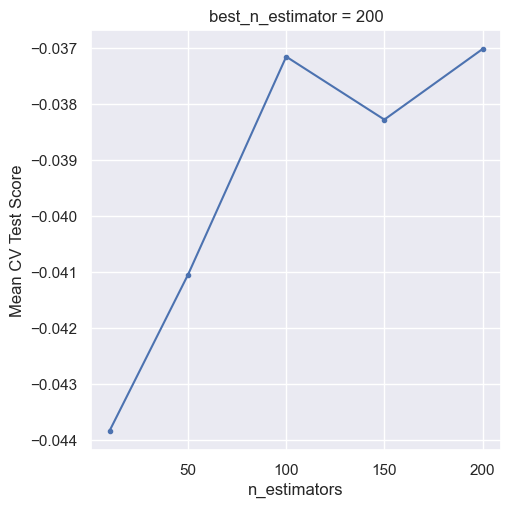

In [82]:
fig=plt.figure(figsize=(18, 12))

axes=fig.add_subplot(2, 3, 1)
axes.plot(est_score.index, est_score.values, marker='.')
axes.set(xlabel='n_estimators', ylabel='Test Score', title='best_n_estimator = 200')

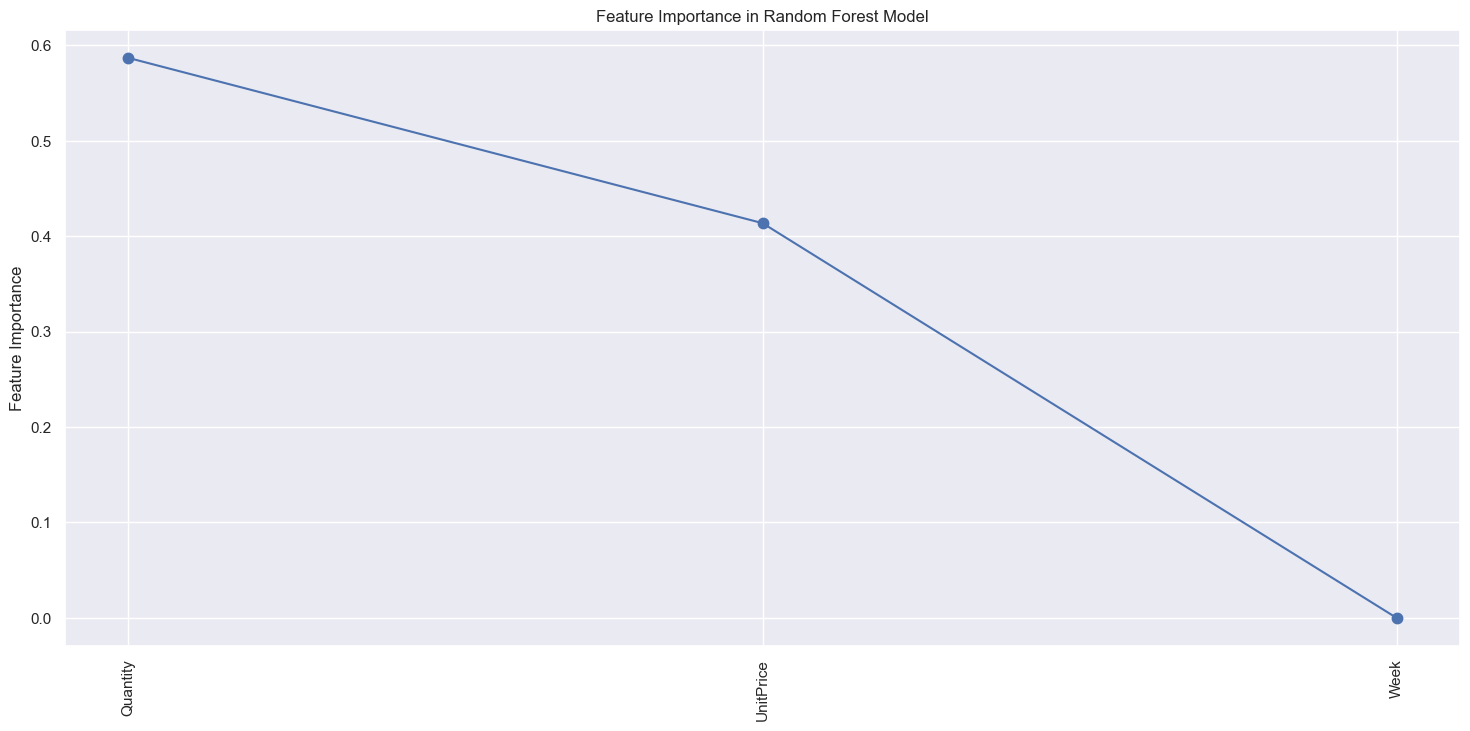

In [83]:
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(rf_main.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(rf_main.best_estimator_.feature_importances_)), X_train.columns,rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance in Random Forest Model')

plt.show()